In [17]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

library(caTools)
library(glmnet)
library(caret)
library(MASS)

[1] "2b-data"

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

In [18]:
library(caTools)
library(glmnet)
library(caret)
library(MASS)

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [19]:

data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)


,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


# **1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

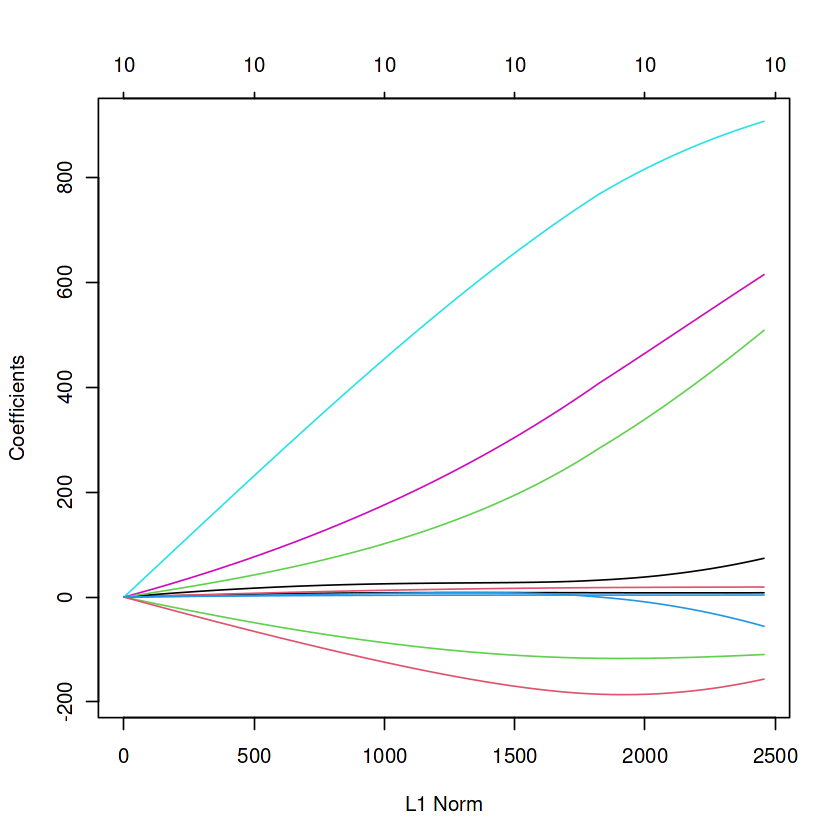

RMSE,Rsquare
<dbl>,<dbl>
1257.682,0.4536504



Since RMSE value is very high and rsquare value is nearly equal to 0.5, the model shows a moderate fit for the test data set, hence the model can be refined further


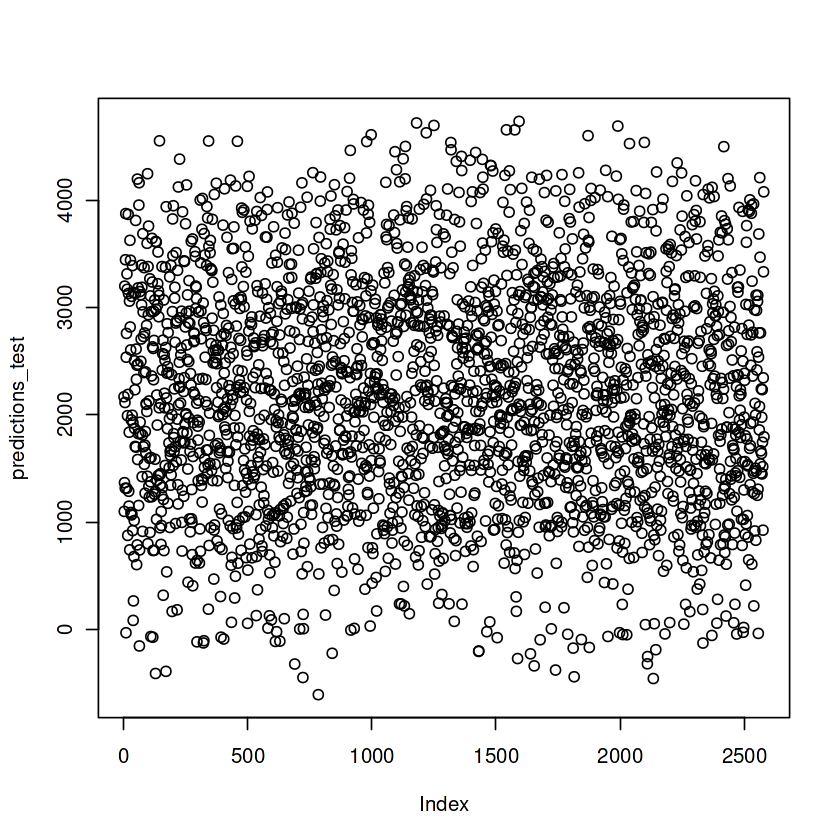

In [20]:
##Write your code here
set.seed(1)
sample<-sample(c(TRUE,FALSE),nrow(data),replace=TRUE,prob=c(0.7,0.3))
train<-data[sample,]
test<-data[!sample,]
x_train<-scale(data.matrix(train[,-c(12,1)]))
y_train<-train$Sales_Performance
x_test<-scale(data.matrix(test[,-c(12,1)]))
y_test<-test$Sales_Performance

eval_results<-function(true,predicted,df) 
{
  SSE<-sum((predicted-true)^2)
  SST<-sum((true-mean(true))^2)
  R_square<-1-SSE/SST
  RMSE=sqrt(SSE/nrow(df))
data.frame(RMSE=RMSE,Rsquare=R_square)  
}

ridge_mod<-glmnet(x_train,y_train,alpha=0)
plot(ridge_mod)

cv_ridge<-cv.glmnet(x_train,y_train,alpha=0)
optimal_lambda<-cv_ridge$lambda.min

predictions_test<-predict(ridge_mod,s=optimal_lambda,newx=x_test)
plot(predictions_test)
eval_results(y_test,predictions_test,test)

cat("\nSince RMSE value is very high and rsquare value is nearly equal to 0.5, the model shows a moderate fit for the test data set, hence the model can be refined further\n")

# **2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

In [21]:
cv_ridge<-cv.glmnet(x_train,y_train,alpha=0)
optimal_lambda<-cv_ridge$lambda.min
cat("Best lambda value for the regression model is:",optimal_lambda)

Best lambda value for the regression model is: 96.55993

# **3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


In [22]:
ridge_mod<-glmnet(x_train,train$Sales_Performance,alpha=0,lambda=optimal_lambda)
ridge_mod$beta
cat("As lambda increases, the strength of regularization grows, shrinking coefficients toward zero and simplifying the model. A smaller lambda allows more flexibility, which can lead to overfitting. Here, the coefficients remain significant, indicating the optimal lambda applies enough regularization without eliminating key features.\n")

10 x 1 sparse Matrix of class "dgCMatrix"
                                s0
Product_Weight            8.173332
Energy_Efficiency        19.140654
Visibility_Index       -109.487479
Product_Category          3.899067
Product_Price           906.922638
Store_ID                614.840234
Store_Established_Year   74.021285
Store_Size             -156.278733
Location_Type           508.743544
Store_Type              -55.785058

As lambda increases, the strength of regularization grows, shrinking coefficients toward zero and simplifying the model. A smaller lambda allows more flexibility, which can lead to overfitting. Here, the coefficients remain significant, indicating the optimal lambda applies enough regularization without eliminating key features.


##### Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

# **1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

Optimal lambda value: 4.378875 


Coefficients of the selected model:
11 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            2188.619373
Product_Weight            4.546647
Energy_Efficiency        14.367688
Visibility_Index        -96.591420
Product_Category          .       
Product_Price           952.936447
Store_ID                727.081024
Store_Established_Year  114.449105
Store_Size             -108.005271
Location_Type           654.932785
Store_Type             -104.985771


R-squared value for the model: 0.4596196 
The R-squared value suggests a moderate fit (near 0.5), indicating potential for further model refinement.


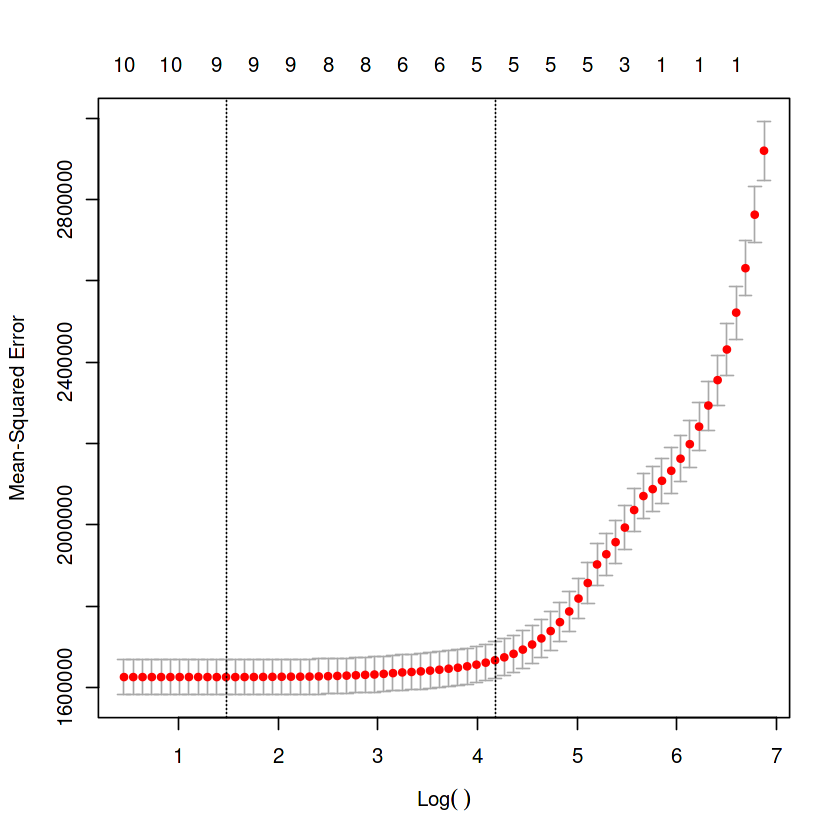

In [23]:
# Perform cross-validation to find the best lambda for Lasso regression
cv_model <- cv.glmnet(x_train, y_train, alpha = 1, nfolds = 1000)
best_lambda <- cv_model$lambda.min

cat("Optimal lambda value:", best_lambda, "\n\n")

# Plot the cross-validation results
plot(cv_model)

# Build the Lasso model using the best lambda value
best_lasso_model <- glmnet(x_train, y_train, alpha = 1, lambda = best_lambda)

cat("\nCoefficients of the selected model:\n")
print(coef(best_lasso_model))
cat("\n\n")

# Make predictions on the test data
y_predicted <- predict(best_lasso_model, s = best_lambda, newx = x_test)

# Calculate total sum of squares (SST) and sum of squared errors (SSE)
sst <- sum((y_test - mean(y_test))^2)
sse <- sum((y_predicted - y_test)^2)

# Compute the R-squared value
rsq <- 1 - sse / sst
cat("R-squared value for the model:", rsq, "\n")
cat("The R-squared value suggests a moderate fit (near 0.5), indicating potential for further model refinement.\n")


# **2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

In [24]:
# Extract the coefficients from the Lasso model and convert them to a matrix
lasso_coef <- as.matrix(coef(best_lasso_model))

# Display all the coefficients of the variables
cat("\nCoefficients of all variables:\n")
print(lasso_coef)

# Identify and print variables that were dropped (i.e., coefficients equal to 0)
dropped_vars <- rownames(lasso_coef)[lasso_coef == 0]
if (length(dropped_vars) > 0) {
  cat("\n\nDropped Variables (with zero coefficients):\n")
  print(dropped_vars)
} else {
  cat("\n\nNo variables were dropped (all coefficients are non-zero).\n")
}



Coefficients of all variables:
                                s0
(Intercept)            2188.619373
Product_Weight            4.546647
Energy_Efficiency        14.367688
Visibility_Index        -96.591420
Product_Category          0.000000
Product_Price           952.936447
Store_ID                727.081024
Store_Established_Year  114.449105
Store_Size             -108.005271
Location_Type           654.932785
Store_Type             -104.985771


Dropped Variables (with zero coefficients):
[1] "Product_Category"


## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

# **1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)


Best model for the given data:

Call:  cv.glmnet(x = x_train, y = y_train, nfolds = 1000, alpha = alpha) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min   4.28    84 1625917 41881      10
1se 176.78    44 1665488 44085       7


Best alpha value: 0.1 
Best lambda value: 4.278205 

Coefficients of the final model:
11 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)            2188.619373
Product_Weight            8.434699
Energy_Efficiency        18.969494
Visibility_Index        -98.519950
Product_Category          3.744901
Product_Price           954.299246
Store_ID                737.805368
Store_Established_Year  128.500892
Store_Size             -100.617812
Location_Type           673.754489
Store_Type             -120.367692

R-squared value for the final model: 0.4598346 


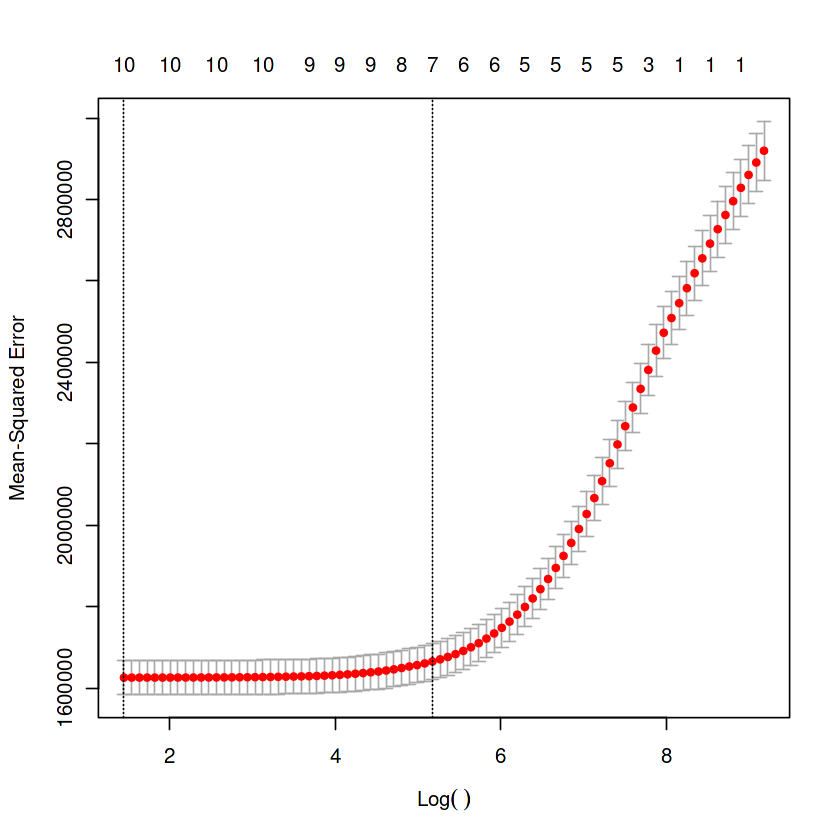

In [25]:
# Define a range of alpha values (from 0 to 1 with steps of 0.1)
alpha_values <- seq(0, 1, by = 0.1)

# Initialize an empty list to store models for each alpha
models <- list()

# Loop through each alpha value and perform cross-validation
for (alpha in alpha_values) {
  cv_model <- cv.glmnet(x_train, y_train, alpha = alpha, nfolds = 1000)
  models[[paste0("alpha_", alpha)]] <- cv_model
}

# Find the alpha value with the minimum cross-validated error
best_alpha <- alpha_values[which.min(sapply(models, function(model) min(model$cvm)))]

# Retrieve the best model based on the optimal alpha
best_model <- models[[paste0("alpha_", best_alpha)]]

# Output the best model, alpha, and lambda values
cat("Best model for the given data:\n")
print(best_model)
cat("\n\nBest alpha value:", best_alpha, "\n")
cat("Best lambda value:", best_model$lambda.min, "\n")

# Optional: Plot the cross-validation result of the best model
plot(best_model)

# Build the final Elastic Net model using the best alpha and lambda
final_model <- glmnet(x_train, y_train, alpha = best_alpha, lambda = best_model$lambda.min)

# Display the coefficients of the final model
cat("\nCoefficients of the final model:\n")
print(coef(final_model))

# Make predictions on the test set and calculate R-squared value
y_pred <- predict(final_model, s = best_model$lambda.min, newx = x_test)
sst <- sum((y_test - mean(y_test))^2)
sse <- sum((y_pred - y_test)^2)
rsq <- 1 - sse / sst

cat("\nR-squared value for the final model:", rsq, "\n")


# Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
# What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

In [26]:
coefficients<-coef(best_model,s=best_model$lambda.min)
coefficients_matrix<-as.matrix(coefficients)
dropped_variables<-rownames(coefficients_matrix)[coefficients_matrix==0]
cat("Dropped variables for alpha=",best_alpha,":\n")
print(dropped_variables)
cat("\n\nBoth of them drop the same variable as per our observation.\n\n")
cat("Elastic Net has two hyperparameters: alpha and lambda. The presence of two hyperparameters gives Elastic Net more flexibility compared to Lasso, which has only one.")

Dropped variables for alpha= 0.1 :
character(0)


Both of them drop the same variable as per our observation.

Elastic Net has two hyperparameters: alpha and lambda. The presence of two hyperparameters gives Elastic Net more flexibility compared to Lasso, which has only one.